<h1 align=center><font size = 5> Analyzing Where to Start an Ice Cream Truck Business in Phoenix</font></h1>

## Introduction

For the Capstone Project, Battle of the Neighborhoods, I will analyze and recommend the best areas within the city of Phoenix to start and operate an Ice Cream Truck business using data science and machine learning.

<b>Problem Statement:</b> A local investor wants to launch an Ice Cream Truck business within the City of Phoenix. However, before launching the business and making a capital investment, the investor needs to determine the best location with the City of Phoenix (over 500 square miles) to focus his operation. 

<b>Evaluation and Recommendation:</b>
To determine the best place to open an Ice Cream Truck business, the investor is seeking a location that is:
1. Near several Public Parks
2. In a city with young families
3. Has limited ice cream locations near by 

However, the investor does not know how to find and analyze the necessary data to evaluate the criteria above. The investor is a friend of mine and knows I am passionate about using data to drive decisions. The investor also knows I recently learned new data skills through IBM Data Science Certification courses on Coursera, and thus has asked for my assistance in developing a recommendation on where to operate an Ice Cream Business within Phoenix.  

<b>The Data:</b>
To conduct this analysis we will analyze publically available data using Python, Data Visualization and Machine Learning.

<i>Part 1: Creating a Dataframe of Phoenix Parks</i>
<li> <b>Data</b> - Fortunately, Phoenix has publically available data about the location of all its parks available at  <a href="https://phoenixopendata.com/dataset/parks/resource/4dedd0ad-ea1e-4000-aec4-e4feca296ea1">Phoenix Parks.</a> </h3>
        This data contains the Longitude of the Park (X), the Latitude of the Park (Y), The Park Name (PlaceName), Park Address (AddressFull), City (AddressCity), State (AddressState), Zip (AddressZip) and Park Details (ParkWeb).</li> 
<li><b>Analysis</b> - We will use the data to create a Panda Dataframe. We then can cluster the parks based on location, using K-Means, and visualize them on a map using Folium. </li>

<br>
<i>Part 2: Visualize, Segment and Cluster Phoenix Parks</i>



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Part 1: Segmenting and Clustering Phoenix Parks</a>

2. <a href="#item2">Explore Neighborhoods in New York City</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

<b>This section will import all the necessary libraries and tools for our data analysis.</b>

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: \ 

<a id='item1'></a>

## Part 1: Creating a Dataframe of Phoenix Parks

Phoenix has publically available data about the location of all its parks available on the City of Phoenix, Arizona web site. This data contains the Longitude of the Park (X), the Latitude of the Park (Y), The Park Name (PlaceName), Park Address (AddressFull), City (AddressCity), State (AddressState), Zip (AddressZip) and Park Details (ParkWeb).

This dataset exists for free on the web and is available at: https://www.phoenixopendata.com/dataset/6a6b86bc-94b3-4995-9128-7a3e60042e1a/resource/4dedd0ad-ea1e-4000-aec4-e4feca296ea1/download/parks20171024.csv

<b> Before we can start analyzing data, the first step is to put the data in a panda dataframe. </b>

In [2]:
#Create a panda data frame from the park data available on City of Phoenix's website
Park_data = pd.read_csv("https://www.phoenixopendata.com/dataset/6a6b86bc-94b3-4995-9128-7a3e60042e1a/resource/4dedd0ad-ea1e-4000-aec4-e4feca296ea1/download/parks20171024.csv")

In [3]:
#look at the data to confirm it imported correctly
Park_data.head()

X          Y               PlaceName               AddressFull  \
0 -112.049636  33.763867   Apache Wash Trailhead  1600 E SONORAN DESERT DR   
1 -112.090026  33.476654  Encanto Park Clubhouse           2605 N 15TH AVE   
2 -112.065841  33.449188            Thomas House            609 E ADAMS ST   
3 -112.065662  33.449587            Teeter House            622 E ADAMS ST   
4 -112.065416  33.449587             Silva House            628 E ADAMS ST   

  AddressCity AddressState  AddressZip  \
0     PHOENIX           AZ       85085   
1     PHOENIX           AZ       85007   
2     PHOENIX           AZ       85004   
3     PHOENIX           AZ       85004   
4     PHOENIX           AZ       85004   

                                            PlaceWeb  
0  https://www.phoenix.gov/parks/trails/locations...  
1  https://www.phoenix.gov/parks/parks/wedding-lo...  
2  https://www.phoenix.gov/parks/parks/alphabetic...  
3  https://www.phoenix.gov/parks/parks/alphabetic...  
4  https://www.phoenix.gov/parks/parks/alphabetic...

<b> Now lets clean up the column names of the data </b>

In [4]:
Park_data.rename(columns={'X':'Longitude'}, inplace=True)
Park_data.rename(columns={'Y':'Latitude'}, inplace=True)
Park_data.rename(columns={'PlaceName':'Park'}, inplace=True)
Park_data.rename(columns={'AddressFull':'Address'}, inplace=True)
Park_data.rename(columns={'AddressCity':'City'}, inplace=True)
Park_data.rename(columns={'AddressState':'State'}, inplace=True)
Park_data.rename(columns={'AddressZip':'Zip'}, inplace=True)
Park_data.head()

Longitude   Latitude                    Park                   Address  \
0 -112.049636  33.763867   Apache Wash Trailhead  1600 E SONORAN DESERT DR   
1 -112.090026  33.476654  Encanto Park Clubhouse           2605 N 15TH AVE   
2 -112.065841  33.449188            Thomas House            609 E ADAMS ST   
3 -112.065662  33.449587            Teeter House            622 E ADAMS ST   
4 -112.065416  33.449587             Silva House            628 E ADAMS ST   

      City State    Zip                                           PlaceWeb  
0  PHOENIX    AZ  85085  https://www.phoenix.gov/parks/trails/locations...  
1  PHOENIX    AZ  85007  https://www.phoenix.gov/parks/parks/wedding-lo...  
2  PHOENIX    AZ  85004  https://www.phoenix.gov/parks/parks/alphabetic...  
3  PHOENIX    AZ  85004  https://www.phoenix.gov/parks/parks/alphabetic...  
4  PHOENIX    AZ  85004  https://www.phoenix.gov/parks/parks/alphabetic...

<b>Let's also remove the PlaceWeb Column as we do not need it</b>

Park_data = Park_data.drop("PlaceWeb", axis=1)
Park_data.head()

<b>We now have a dataframe showing the Phoenix Park Data. Let's also validate all the data was imported</b>

In [5]:
Park_data.shape

(223, 8)

<b> There are 223 Phoenix Parks </b>

## Part 2: Visualization of Phoenix Parks

<b> We will use the geopy library to get the latitude and longitude of Phoenix, Arizona</b>

In [6]:
address = 'Phoenix, AZ'

geolocator = Nominatim(user_agent="az_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Phoenix, Arizona are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Phoenix, Arizona are 33.4484367, -112.0741417.


<b> We now will map out Phoenix with the Parks identified on top of it, using the Folium library </b>

In [7]:
# create map of Phoenix using latitude and longitude values and showing how the parks cluster
Phoenix = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(Park_data['Latitude'], Park_data['Longitude'], Park_data['Park']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Phoenix)   
    
Phoenix

## Part 3: Using Foursquare API to Segment and Explore Parks

<b> Now, we can use the Foursquare API to further explore the parks and segment them. </b>

First, we must define my Foursquare credentials and version

In [8]:
CLIENT_ID = 'XTSXIXKK1O4SKACMNGUTH2LCDC3DU3C5NRT2GIWIZLNYMPS4' # my Foursquare ID
CLIENT_SECRET = 'B4IKELXR0UW1512I4FJK15EQMR0Z101BB2WUBCJFES4BRFXT' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XTSXIXKK1O4SKACMNGUTH2LCDC3DU3C5NRT2GIWIZLNYMPS4
CLIENT_SECRET:B4IKELXR0UW1512I4FJK15EQMR0Z101BB2WUBCJFES4BRFXT


<b> Now we will look at the first park in our dataframe </b>

Get the park's name.

In [9]:
Park_data.loc[0, 'Park']

'Apache Wash Trailhead'

Get the park's latitude and longitude values.

In [10]:
park_latitude = Park_data.loc[0, 'Latitude'] # park's latitude value
park_longitude = Park_data.loc[0, 'Longitude'] # park's longitude value

park_name = Park_data.loc[0, 'Park'] # park's name

print('Latitude and longitude values of {} are {}, {}.'.format(park_name, 
                                                               park_latitude, 
                                                               park_longitude))

Latitude and longitude values of Apache Wash Trailhead are 33.76386662, -112.04963559999999.


<b> Next, we will look at the top 10 venues nearby, within 1000 meters </b>

First, let's create the GET request URL, named **url**.

In [11]:
LIMIT = 10 # limit of number of venues returned by Foursquare API

radius = 10000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    park_latitude, 
    park_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XTSXIXKK1O4SKACMNGUTH2LCDC3DU3C5NRT2GIWIZLNYMPS4&client_secret=B4IKELXR0UW1512I4FJK15EQMR0Z101BB2WUBCJFES4BRFXT&v=20180605&ll=33.76386662,-112.04963559999999&radius=10000&limit=10'

Now we will use the GET request and examine the results

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e20b401df2774001ce10870'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Phoenix',
  'headerFullLocation': 'Phoenix',
  'headerLocationGranularity': 'city',
  'totalResults': 142,
  'suggestedBounds': {'ne': {'lat': 33.85386671000009,
    'lng': -111.94157803535826},
   'sw': {'lat': 33.67386652999991, 'lng': -112.15769316464171}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '52c1d8b8498e814391c036be',
       'name': 'Apache Wash Trailhead',
       'location': {'lat': 33.76778608349648,
        'lng': -112.04469986138423,
        'labeledLatLngs': [{'label': 'display',
          'lat': 33.76778608349

Let's analyze the **get_category_type** function to help us determine what type of venues are nearby. 

In [13]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we will clean the json and structure it into a *pandas* dataframe.

In [14]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name          categories  \
0                              Apache Wash Trailhead               Trail   
1  City Of Phoenix Sonoran Preserve Dixie Mountai...               Trail   
2                                      Barro's Pizza         Pizza Place   
3                                     El Encanto Dos  Mexican Restaurant   
4                                  Fry's Marketplace       Grocery Store   

         lat         lng  
0  33.767786 -112.044700  
1  33.741135 -112.097467  
2  33.765427 -111.983815  
3  33.800032 -112.058591  
4  33.786054 -112.119405

Let's see how many venues total were returned:

In [15]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

10 venues were returned by Foursquare.


Since this number is small lets look at all of them

In [16]:
nearby_venues

name          categories  \
0                              Apache Wash Trailhead               Trail   
1  City Of Phoenix Sonoran Preserve Dixie Mountai...               Trail   
2                                      Barro's Pizza         Pizza Place   
3                                     El Encanto Dos  Mexican Restaurant   
4                                  Fry's Marketplace       Grocery Store   
5                                       CVS pharmacy            Pharmacy   
6                                   Sonoran Preserve               Trail   
7                                   Fry's Food Store       Grocery Store   
8                        Dove Valley Ranch Golf Club         Golf Course   
9                                          Walgreens            Pharmacy   

         lat         lng  
0  33.767786 -112.044700  
1  33.741135 -112.097467  
2  33.765427 -111.983815  
3  33.800032 -112.058591  
4  33.786054 -112.119405  
5  33.741929 -112.106945  
6  33.741050 -112.097452  
7  33.752354 -111.990897  
8  33.790848 -111.994418  
9  33.754726 -111.990356

good  news...no ice cream places! 

<b> Now, we will repeat for all parks in Phoenix </b>

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Park', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
Now, we will run the above funtion on each park and create a new dataframe called park_venues

In [22]:
park_venues = getNearbyVenues(names=Park_data['Park'],
                                   latitudes=Park_data['Latitude'],
                                   longitudes=Park_data['Longitude']
                                  )

Apache Wash Trailhead
Encanto Park Clubhouse
Thomas House
Teeter House
Silva House
Teeter Carriage House
Heritage and Science Park
Burgess Carriage House
Phoenix Municipal Stadium
Papago Sports Complex
Tovrea Castle
Falcon Park
Coronado Park
Enchanted Island
Patriots Square Park
Irish Cultural Center
Stevens House
Stevens-Haustgen House
Machine Shop
Peace Park
Dust Devil Park
University Park
Valley Garden Center
Sherman Parkway Park
Tawa Mini Park
Washington Park
Kachina Park
Echo Canyon Recreation Area
Rose Mofford Sports Complex


KeyError: 'groups'

This is how big the dataframe is:

In [23]:
print(park_venues.shape)
park_venues.head()

(2052, 7)


Park   Latitude   Longitude                     Venue  \
0   Apache Wash Trailhead  33.763867 -112.049636     Apache Wash Trailhead   
1   Apache Wash Trailhead  33.763867 -112.049636  Phoenix Sonoran Preserve   
2  Encanto Park Clubhouse  33.476654 -112.090026              Encanto Park   
3  Encanto Park Clubhouse  33.476654 -112.090026  Original Hamburger Works   
4  Encanto Park Clubhouse  33.476654 -112.090026       Encanto Golf Course   

   Venue Latitude  Venue Longitude   Venue Category  
0       33.767786      -112.044700            Trail  
1       33.767726      -112.044514  Nature Preserve  
2       33.474524      -112.090326             Park  
3       33.479841      -112.091115     Burger Joint  
4       33.477672      -112.090896      Golf Course

In [ ]:
We will now look at how many venues were returned for each park

In [24]:
park_venues.groupby('Park').count()

Latitude  Longitude  Venue  \
Park                                                                     
10th Street Wash Park                             10         10     10   
Acacia Park                                       10         10     10   
Acoma Park                                        10         10     10   
Adobe Mountain Park                               10         10     10   
Alicia Park                                       10         10     10   
Alkire Park                                       10         10     10   
Altadena Park                                     10         10     10   
Apache Wash Trailhead                              2          2      2   
Arcadia Park                                      10         10     10   
Arizona Horse Lovers Park                          5          5      5   
Aya Mini Park                                     10         10     10   
Barrios Unidos Park                               10         10     10   
Bartlett Circle                                   10         10     10   
Buffalo Ridge Park                                10         10     10   
Burgess Carriage House                            10         10     10   
Cactus Park                                       10         10     10   
Camelback Mountain                                10         10     10   
Camelback Ranch Park                              10         10     10   
Cancer Survivors Park                             10         10     10   
Cashman Park                                      10         10     10   
Cave Buttes Recreation Area                        1          1      1   
Cave Creek Park - Cactus                          10         10     10   
Cave Creek Park - Cholla                          10         10     10   
Cave Creek Park - Larkspur                        10         10     10   
Cave Creek Park - Sweetwater                      10         10     10   
Cave Creek Park - Thunderbird                     10         10     10   
Central Park                                      10         10     10   
Cesar Chavez Park                                 10         10     10   
Cesar Chavez Sports Complex                        7          7      7   
Cholla Cove Park                                  10         10     10   
Christy Cove Park                                  5          5      5   
Cielito Park                                      10         10     10   
Circle K Park                                      6          6      6   
Civic Space Park                                  10         10     10   
Coffelt-Lamoreaux Park                            10         10     10   
Colter Park                                       10         10     10   
Conocido Park                                     10         10     10   
Coronado Park                                     10         10     10   
Cortez Park                                       10         10     10   
Country Club Oval Park                            10         10     10   
Country Gables Park                               10         10     10   
Coyote Basin Park                                 10         10     10   
Crossed Arrows Park                               10         10     10   
Deem Hills Park                                    4          4      4   
Deem Hills Recreation Area                         1          1      1   
Deer Valley Park                                  10         10     10   
Desert Broom Park                                 10         10     10   
Desert Foothills Park                             10         10     10   
Desert Horizon Park                                9          9      9   
Desert Star Park                                  10         10     10   
Desert Storm Park                                 10         10     10   
Desert West Park                                  10         10     10   
Desert West Sports Complex                      

Let's see how many unique categories were returned

In [25]:
print('There are {} uniques categories.'.format(len(park_venues['Venue Category'].unique())))

There are 225 uniques categories.


<a id='item3'></a>

## Part 3: Analyzing Parks

And let's examine the new dataframe size.

In [26]:
# one hot encoding
park_onehot = pd.get_dummies(park_venues[['Venue Category']], prefix="", prefix_sep="")

# add park column back to dataframe
park_onehot['Park'] = park_venues['Park'] 

# move park column to the first column
fixed_columns = [park_onehot.columns[-1]] + list(park_onehot.columns[:-1])
park_onehot = park_onehot[fixed_columns]

park_onehot.head()

Zoo Exhibit  ATM  Advertising Agency  African Restaurant  \
0            0    0                   0                   0   
1            0    0                   0                   0   
2            0    0                   0                   0   
3            0    0                   0                   0   
4            0    0                   0                   0   

   American Restaurant  Antique Shop  Art Gallery  Art Museum  \
0                    0             0            0           0   
1                    0             0            0           0   
2                    0             0            0           0   
3                    0             0            0           0   
4                    0             0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Automotive Shop  \
0                    0                 0                   0                0   
1                    0                 0                   0                0   
2                    0                 0                   0                0   
3                    0                 0                   0                0   
4                    0                 0                   0                0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0          0           0       0     0    0               0                 0   
1          0           0       0     0    0               0                 0   
2          0           0       0     0    0               0                 0   
3          0           0       0     0    0               0                 0   
4          0           0       0     0    0               0                 0   

   Basketball Court  Basketball Stadium  Bed & Breakfast  Beer Store  \
0                 0                   0                0           0   
1                 0                   0                0           0   
2                 0                   0                0           0   
3                 0                   0                0           0   
4                 0                   0                0           0   

   Big Box Store  Bookstore  Botanical Garden  Boutique  Bowling Alley  \
0              0          0                 0         0              0   
1              0          0                 0         0              0   
2              0          0                 0         0              0   
3              0          0                 0         0              0   
4              0          0                 0         0              0   

   Breakfast Spot  Brewery  Buffet  Building  Burger Joint  Burrito Place  \
0               0        0       0         0             0              0   
1               0        0       0         0             0              0   
2               0        0       0         0             0              0   
3               0        0       0         0             1              0   
4               0        0       0         0             0              0   

   Business Service  Café  Canal  Capitol Building  Caribbean Restaurant  \
0                 0     0      0                 0                     0   
1                 0     0      0                 0                     0   
2                 0     0      0                 0                     0   
3                 0     0      0                 0                     0   
4                 0     0      0                 0                     0   

   Castle  Check Cashing Service  Chinese Restaurant  Church  Clothing Store  \
0       0                      0                   0       0               0   
1       0                      0                   0       0               0   
2       0                      0                   0       0               0   
3       0                      0                   0       0               0   
4       0                      0                   0       0 

In [27]:
#code to move Park column to the front
cols = list(park_onehot.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('Park')) #Remove b from list
park1_onehot = park_onehot[['Park']+cols] #Create new dataframe with columns in the order you want
park1_onehot.head()

Park  Zoo Exhibit  ATM  Advertising Agency  \
0   Apache Wash Trailhead            0    0                   0   
1   Apache Wash Trailhead            0    0                   0   
2  Encanto Park Clubhouse            0    0                   0   
3  Encanto Park Clubhouse            0    0                   0   
4  Encanto Park Clubhouse            0    0                   0   

   African Restaurant  American Restaurant  Antique Shop  Art Gallery  \
0                   0                    0             0            0   
1                   0                    0             0            0   
2                   0                    0             0            0   
3                   0                    0             0            0   
4                   0                    0             0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0                0          0           0       0     0    0               0   
1                0          0           0       0     0    0               0   
2                0          0           0       0     0    0               0   
3                0          0           0       0     0    0               0   
4                0          0           0       0     0    0               0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Bed & Breakfast  \
0                 0                 0                   0                0   
1                 0                 0                   0                0   
2                 0                 0                   0                0   
3                 0                 0                   0                0   
4                 0                 0                   0                0   

   Beer Store  Big Box Store  Bookstore  Botanical Garden  Boutique  \
0           0              0          0                 0         0   
1           0              0          0                 0         0   
2           0              0          0                 0         0   
3           0              0          0                 0         0   
4           0              0          0                 0         0   

   Bowling Alley  Breakfast Spot  Brewery  Buffet  Building  Burger Joint  \
0              0               0        0       0         0             0   
1              0               0        0       0         0             0   
2              0               0        0       0         0             0   
3              0               0        0       0         0             1   
4              0               0        0       0         0             0   

   Burrito Place  Business Service  Café  Canal  Capitol Building  \
0              0                 0     0      0                 0   
1              0                 0     0      0                 0   
2              0                 0     0      0                 0   
3              0                 0     0      0                 0   
4              0                 0     0      0                 0   

   Caribbean Restaurant  Castle  Check Cashing Service  Chinese Restaurant  \
0                     0       0                      0                   0   
1                     0       0                      0                   0   
2                     0       0                      0                   0   
3                     0       0                      0                   0   
4                     0       0                      0                   0   

In [28]:
park1_onehot.shape

(2052, 225)

In [ ]:
Now, we will group rows by parks and take the mean frequency of occurence of each category

In [29]:
park_grouped = park1_onehot.groupby('Park').mean().reset_index()
park_grouped

Park  Zoo Exhibit  ATM  \
0                         10th Street Wash Park          0.0  0.0   
1                                   Acacia Park          0.0  0.0   
2                                    Acoma Park          0.0  0.0   
3                           Adobe Mountain Park          0.0  0.0   
4                                   Alicia Park          0.0  0.0   
5                                   Alkire Park          0.0  0.0   
6                                 Altadena Park          0.0  0.0   
7                         Apache Wash Trailhead          0.0  0.0   
8                                  Arcadia Park          0.0  0.0   
9                     Arizona Horse Lovers Park          0.0  0.0   
10                                Aya Mini Park          0.0  0.0   
11                          Barrios Unidos Park          0.0  0.0   
12                              Bartlett Circle          0.0  0.0   
13                           Buffalo Ridge Park          0.0  0.0   
14                       Burgess Carriage House          0.0  0.0   
15                                  Cactus Park          0.0  0.0   
16                           Camelback Mountain          0.0  0.0   
17                         Camelback Ranch Park          0.0  0.0   
18                        Cancer Survivors Park          0.0  0.0   
19                                 Cashman Park          0.0  0.0   
20                  Cave Buttes Recreation Area          0.0  0.0   
21                     Cave Creek Park - Cactus          0.0  0.0   
22                     Cave Creek Park - Cholla          0.0  0.0   
23                   Cave Creek Park - Larkspur          0.0  0.0   
24                 Cave Creek Park - Sweetwater          0.0  0.0   
25                Cave Creek Park - Thunderbird          0.0  0.0   
26                                 Central Park          0.0  0.0   
27                            Cesar Chavez Park          0.0  0.0   
28                  Cesar Chavez Sports Complex          0.0  0.0   
29                             Cholla Cove Park          0.0  0.0   
30                            Christy Cove Park          0.0  0.0   
31                                 Cielito Park          0.0  0.0   
32                                Circle K Park          0.0  0.0   
33                             Civic Space Park          0.0  0.0   
34                       Coffelt-Lamoreaux Park          0.0  0.0   
35                                  Colter Park          0.0  0.0   
36                                Conocido Park          0.0  0.0   
37                                Coronado Park          0.0  0.0   
38                                  Cortez Park          0.0  0.0   
39                       Country Club Oval Park          0.0  0.0   
40                          Country Gables Park          0.0  0.0   
41                            Coyote Basin Park          0.0  0.0   
42                          Crossed Arrows Park          0.0  0.1   
43                              Deem Hills Park          0.0  0.0   
44                   Deem Hills Recreation Area          0.0  0.0   
45                             Deer Valley Park          0.0  0.0   
46                            Desert Broom Park          0.0  0.0   
47                        Desert Foothills Park          0.0  0.0   
48                          Desert Horizon Park          0.0  0.0   
49                             Desert Star Park          0.0  0.0   
50                            Desert Storm Park          0.0  0.0   
51                             Desert West Park          0.0  0.0   
52                   Desert West Sports Complex          0.0  0.0   
53                           Desert Willow Park          0.0  0.0   
54                             Dove Valley Park          0.0  0.0   
55                  Dreamy Draw Recreation Area          0.0  0.0   
56                              Dust Devil Park          0.0  0.0   
57                                Dynamit

In [ ]:
Confirm size

In [30]:
park_grouped.shape

(223, 225)

Let's see the mean and average for each category

In [31]:
(park_grouped.describe())

Zoo Exhibit         ATM  Advertising Agency  African Restaurant  \
count   223.000000  223.000000          223.000000          223.000000   
mean      0.000897    0.001345            0.000897            0.000448   
std       0.009449    0.011546            0.013393            0.006696   
min       0.000000    0.000000            0.000000            0.000000   
25%       0.000000    0.000000            0.000000            0.000000   
50%       0.000000    0.000000            0.000000            0.000000   
75%       0.000000    0.000000            0.000000            0.000000   
max       0.100000    0.100000            0.200000            0.100000   

       American Restaurant  Antique Shop  Art Gallery  Art Museum  \
count           223.000000    223.000000   223.000000  223.000000   
mean              0.018884      0.001794     0.006315    0.000897   
std               0.043642      0.013302     0.031105    0.009449   
min               0.000000      0.000000     0.000000    0.000000   
25%               0.000000      0.000000     0.000000    0.000000   
50%               0.000000      0.000000     0.000000    0.000000   
75%               0.000000      0.000000     0.000000    0.000000   
max               0.200000      0.100000     0.250000    0.100000   

       Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
count           223.000000        223.000000          223.000000   
mean              0.002691          0.004484            0.004036   
std               0.018791          0.020742            0.027375   
min               0.000000          0.000000            0.000000   
25%               0.000000          0.000000            0.000000   
50%               0.000000          0.000000            0.000000   
75%               0.000000          0.000000            0.000000   
max               0.200000          0.100000            0.300000   

       Automotive Shop   BBQ Joint  Bagel Shop      Bakery        Bank  \
count       223.000000  223.000000  223.000000  223.000000  223.000000   
mean          0.001836    0.005992    0.002242    0.005680    0.006278   
std           0.016085    0.024196    0.014838    0.024253    0.024311   
min           0.000000    0.000000    0.000000    0.000000    0.000000   
25%           0.000000    0.000000    0.000000    0.000000    0.000000   
50%           0.000000    0.000000    0.000000    0.000000    0.000000   
75%           0.000000    0.000000    0.000000    0.000000    0.000000   
max           0.166667    0.125000    0.100000    0.166667    0.100000   

              Bar  Baseball Field  Baseball Stadium  Basketball Court  \
count  223.000000      223.000000        223.000000        223.000000   
mean     0.006278        0.008392          0.006726          0.000448   
std      0.027771        0.045440          0.026839          0.006696   
min      0.000000        0.000000          0.000000          0.000000   
25%      0.000000        0.000000          0.000000          0.000000   
50%      0.000000        0.000000          0.000000          0.000000   
75%      0.000000        0.000000          0.000000          0.000000   
max      0.200000        0.428571          0.200000          0.100000   

       Basketball Stadium  Bed & Breakfast  Beer Store  Big Box Store  \
count          223.000000       223.000000  223.000000     223.000000   
mean             0.000897         0.000897    0.000897       0.001537   
std              0.009449         0.013393    0.009449       0.013403   
min              0.000000         0.000000    0.000000       0.000000   
25%              0.000000         0.000000    0.000000       0.000000   
50%              0.000000         0.000000    0.000000       0.000000   
75%              0.000000         0.000000    0.000000       0.000000   
max              0.100000         0.200000    0.100000       0.142857   

        Bookstore  Botanical Garden    Boutique  Bowling Alley  \
count  223.000000        223.000000  223.000000     223.

Now lets look at the Ice Cream Column

In [32]:
park_grouped["Ice Cream Shop"].mean()

0.008071748878923767

In [33]:
park_grouped["Frozen Yogurt Shop"].mean()

0.001345291479820628

In [ ]:
There are not many ice cream or frozen yogurt shops near parks in phoenix! 

In [34]:
IceCreamShops = park_grouped[['Park','Ice Cream Shop', 'Frozen Yogurt Shop']]
IceCreamShops

Park  Ice Cream Shop  \
0                         10th Street Wash Park             0.0   
1                                   Acacia Park             0.0   
2                                    Acoma Park             0.0   
3                           Adobe Mountain Park             0.0   
4                                   Alicia Park             0.1   
5                                   Alkire Park             0.0   
6                                 Altadena Park             0.0   
7                         Apache Wash Trailhead             0.0   
8                                  Arcadia Park             0.0   
9                     Arizona Horse Lovers Park             0.0   
10                                Aya Mini Park             0.0   
11                          Barrios Unidos Park             0.0   
12                              Bartlett Circle             0.0   
13                           Buffalo Ridge Park             0.0   
14                       Burgess Carriage House             0.0   
15                                  Cactus Park             0.0   
16                           Camelback Mountain             0.0   
17                         Camelback Ranch Park             0.0   
18                        Cancer Survivors Park             0.0   
19                                 Cashman Park             0.0   
20                  Cave Buttes Recreation Area             0.0   
21                     Cave Creek Park - Cactus             0.0   
22                     Cave Creek Park - Cholla             0.0   
23                   Cave Creek Park - Larkspur             0.0   
24                 Cave Creek Park - Sweetwater             0.0   
25                Cave Creek Park - Thunderbird             0.0   
26                                 Central Park             0.0   
27                            Cesar Chavez Park             0.0   
28                  Cesar Chavez Sports Complex             0.0   
29                             Cholla Cove Park             0.0   
30                            Christy Cove Park             0.0   
31                                 Cielito Park             0.0   
32                                Circle K Park             0.0   
33                             Civic Space Park             0.0   
34                       Coffelt-Lamoreaux Park             0.0   
35                                  Colter Park             0.0   
36                                Conocido Park             0.0   
37                                Coronado Park             0.1   
38                                  Cortez Park             0.0   
39                       Country Club Oval Park             0.0   
40                          Country Gables Park             0.0   
41                            Coyote Basin Park             0.0   
42                          Crossed Arrows Park             0.1   
43                              Deem Hills Park             0.0   
44                   Deem Hills Recreation Area             0.0   
45                             Deer Valley Park             0.0   
46                            Desert Broom Park             0.1   
47                        Desert Foothills Park             0.0   
48                          Desert Horizon Park             0.0   
49                             Desert Star Park             0.0   
50                            Desert Storm Park             0.0   
51                             Desert West Park             0.0   
52                   Desert West Sports Complex             0.0   
53                           Desert Willow Park             0.0   
54                             Dove Valley Park             0.0   
55                  Dreamy Draw Recreation Area             0.0   
56                              Dust Devil Park             0.0   
57                                Dynamite Park             0.0   
58                                Eastlake Park             0.0   
59                  Ech

In [ ]:
Now, we will print each Park along with the top 5 most common venues

In [35]:
num_top_venues = 5

for hood in park_grouped['Park']:
    print("----"+hood+"----")
    temp = park_grouped[park_grouped['Park'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10th Street Wash Park----
                venue  freq
0  Mexican Restaurant   0.2
1   Convenience Store   0.1
2           BBQ Joint   0.1
3             Brewery   0.1
4       Bowling Alley   0.1


----Acacia Park----
               venue  freq
0     Hardware Store   0.2
1  Electronics Store   0.2
2        Pizza Place   0.1
3  Convenience Store   0.1
4     Sandwich Place   0.1


----Acoma Park----
                  venue  freq
0  Fast Food Restaurant   0.1
1        Cosmetics Shop   0.1
2    Salon / Barbershop   0.1
3            Hobby Shop   0.1
4          Home Service   0.1


----Adobe Mountain Park----
               venue  freq
0                Gym   0.2
1       Intersection   0.1
2  Convenience Store   0.1
3       Cocktail Bar   0.1
4        Video Store   0.1


----Alicia Park----
                 venue  freq
0        Grocery Store   0.2
1       Sandwich Place   0.2
2    Convenience Store   0.1
3  Japanese Restaurant   0.1
4       Discount Store   0.1


----Alkire Park----
       

In [ ]:
We will now put the venues into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each park.

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Park']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
park_venues_sorted = pd.DataFrame(columns=columns)
park_venues_sorted['Park'] = park_grouped['Park']

for ind in np.arange(park_grouped.shape[0]):
    park_venues_sorted.iloc[ind, 1:] = return_most_common_venues(park_grouped.iloc[ind, :], num_top_venues)

park_venues_sorted.head()

Park 1st Most Common Venue 2nd Most Common Venue  \
0  10th Street Wash Park    Mexican Restaurant         Bowling Alley   
1            Acacia Park     Electronics Store        Hardware Store   
2             Acoma Park        Cosmetics Shop          Home Service   
3    Adobe Mountain Park                   Gym     Convenience Store   
4            Alicia Park         Grocery Store        Sandwich Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0             BBQ Joint      Greek Restaurant  Gym / Fitness Center   
1           Pizza Place  Fast Food Restaurant        Sandwich Place   
2    Salon / Barbershop  Fast Food Restaurant      Greek Restaurant   
3                 Trail          Cocktail Bar              Pharmacy   
4     Convenience Store        Discount Store   Rental Car Location   

  6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
0        Sandwich Place  Thrift / Vintage Store               Brewery   
1             Juice Bar        Greek Restaurant     Convenience Store   
2            Hobby Shop      Seafood Restaurant            Sports Bar   
3           Video Store            Intersection                Museum   
4              Pharmacy     Japanese Restaurant        Ice Cream Shop   

  9th Most Common Venue 10th Most Common Venue  
0     Convenience Store              Disc Golf  
1     Food & Drink Shop            Fabric Shop  
2     Convenience Store      Food & Drink Shop  
3     Food & Drink Shop             Food Court  
4     Food & Drink Shop                   Food

<a id='item4'></a>

## Part 4: Cluster Parks

We will run *k*-means to cluster the parks into 5 clusters.

In [38]:
# set number of clusters
kclusters = 5

park_grouped_clustering = park_grouped.drop('Park', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(park_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 1, 1, 1, 4, 1, 0, 1, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [39]:
# add clustering labels
park_venues_sorted.insert(0, 'Cluster Labels1', kmeans.labels_)

park_merged = Park_data

# 
park_merged = park_merged.join(park_venues_sorted.set_index('Park'), on='Park')

park_merged.head() # check the last columns!

Longitude   Latitude                    Park                   Address  \
0 -112.049636  33.763867   Apache Wash Trailhead  1600 E SONORAN DESERT DR   
1 -112.090026  33.476654  Encanto Park Clubhouse           2605 N 15TH AVE   
2 -112.065841  33.449188            Thomas House            609 E ADAMS ST   
3 -112.065662  33.449587            Teeter House            622 E ADAMS ST   
4 -112.065416  33.449587             Silva House            628 E ADAMS ST   

      City State    Zip                                           PlaceWeb  \
0  PHOENIX    AZ  85085  https://www.phoenix.gov/parks/trails/locations...   
1  PHOENIX    AZ  85007  https://www.phoenix.gov/parks/parks/wedding-lo...   
2  PHOENIX    AZ  85004  https://www.phoenix.gov/parks/parks/alphabetic...   
3  PHOENIX    AZ  85004  https://www.phoenix.gov/parks/parks/alphabetic...   
4  PHOENIX    AZ  85004  https://www.phoenix.gov/parks/parks/alphabetic...   

   Cluster Labels1 1st Most Common Venue 2nd Most Common Venue  \
0                0                 Trail       Nature Preserve   
1                1        Sandwich Place            Theme Park   
2                1        Science Museum           Opera House   
3                1        Science Museum           Opera House   
4                1        Science Museum           Opera House   

  3rd Most Common Venue 4th Most Common Venue          5th Most Common Venue  \
0           Fabric Shop      Football Stadium                     Food Truck   
1           Golf Course  Fast Food Restaurant  Vegetarian / Vegan Restaurant   
2           Pizza Place      Baseball Stadium                       Wine Bar   
3           Pizza Place      Baseball Stadium                       Wine Bar   
4           Pizza Place      Baseball Stadium                       Wine Bar   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Food Service            Food Court     Food & Drink Shop   
1         Historic Site    Chinese Restaurant                 Diner   
2                Museum   Japanese Restaurant        History Museum   
3                Museum   Japanese Restaurant        History Museum   
4                Museum   Japanese Restaurant        History Museum   

  9th Most Common Venue 10th Most Common Venue  
0                  Food      Fondue Restaurant  
1          Burger Joint      Fondue Restaurant  
2               Theater      Fish & Chips Shop  
3               Theater      Fish & Chips Shop  
4               Theater      Fish & Chips Shop

Finally, let's visualize the resulting clusters

In [40]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(park_merged['Latitude'], park_merged['Longitude'], park_merged['Park'], park_merged['Cluster Labels1']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 5. Part 5: Examine Clusters

In [ ]:
Now we will examine each cluster and determine the categories that distinguish it

#### Cluster 1

In [41]:
park_merged.loc[park_merged['Cluster Labels1'] == 0, park_merged.columns[[1] + list(range(5, park_merged.shape[1]))]]

Latitude State    Zip  \
0    33.763867    AZ  85085   
27   33.521451    AZ  85018   
42   33.455348    AZ  85008   
47   33.538884    AZ  85016   
82   33.660348    AZ  85050   
97   33.740866    AZ  85085   
101  33.663299    AZ  85050   
105  33.727458    AZ  85083   
107  33.514585    AZ  85018   
135  33.348175    AZ  85042   
146  33.733425    AZ  85083   
184  33.563959    AZ  85020   
185  33.582675    AZ  85020   
217  33.547158    AZ  85020   
219  33.627218    AZ  85022   

                                              PlaceWeb  Cluster Labels1  \
0    https://www.phoenix.gov/parks/trails/locations...                0   
27   https://www.phoenix.gov/parks/trails/locations...                0   
42   https://www.phoenix.gov/parks/trails/locations...                0   
47   https://www.phoenix.gov/parks/trails/locations...                0   
82   https://www.phoenix.gov/parks/trails/locations...                0   
97   https://www.phoenix.gov/parks/trails/locations...                0   
101          http://phoenix.gov/parks/parks/azhlp.html                0   
105  https://www.phoenix.gov/parks/parks/alphabetic...                0   
107  https://www.phoenix.gov/parks/trails/locations...                0   
135  https://www.phoenix.gov/parks/trails/locations...                0   
146  https://www.phoenix.gov/parks/trails/locations...                0   
184  https://www.phoenix.gov/parks/trails/locations...                0   
185  https://www.phoenix.gov/parks/trails/locations...                0   
217  https://www.phoenix.gov/parks/trails/locations...                0   
219  https://www.phoenix.gov/parks/trails/locations...                0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                   Trail       Nature Preserve           Fabric Shop   
27                  Trail    Spanish Restaurant           Coffee Shop   
42                  Trail                   Zoo   American Restaurant   
47                  Trail        Scenic Lookout         Event Service   
82                 Museum           Art Gallery             Gift Shop   
97                  Trail      Insurance Office            Restaurant   
101     Other Repair Shop                Museum           Art Gallery   
105                 Trail              Mountain      Department Store   
107                 Trail                  Pool              Mountain   
135                 Trail         Event Service        Science Museum   
146                 Trail    Frozen Yogurt Shop      Football Stadium   
184                 Trail          Intersection      Business Service   
185                 Trail        Scenic Lookout        Breakfast Spot   
217                 Trail        Scenic Lookout         Event Service   
219                 Trail                 Diner          Concert Hall   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0        Football Stadium            Food Truck          Food Service   
27                    Spa          Cocktail Bar            Restaurant   
42       Botanical Garden              Mountain  Other Great Outdoors   
47       Football Stadium            Food Truck          Food Service   
82                  Trail                   Zoo        Farmers Market   
97           Tennis Court          Intersection              Pharmacy   
101             Gift Shop                 Trail                   Zoo   
105        Farmers Market   Fried Chicken Joint      Football Stadium   
107          Tennis Court                   Gym                   Spa   
135      Football Stadium            Food Truck          Food Service   
146            Food Truck          Food Service            Food Court   
184               Dog Run        Farmers Market      Football Stadium   
185    Italian Restaurant     Convenience Store    Mexican Restaurant   
217      Football Stadium            Food Truck          Food Service   
219           Fabric Shop      Football Stad

<b> We will call Cluster 1 "Trails" </b>

#### Cluster 2

In [42]:
park_merged.loc[park_merged['Cluster Labels1'] == 1, park_merged.columns[[1] + list(range(5, park_merged.shape[1]))]]

Latitude State    Zip  \
1    33.476654    AZ  85007   
2    33.449188    AZ  85004   
3    33.449587    AZ  85004   
4    33.449587    AZ  85004   
5    33.449834    AZ  85004   
6    33.449806    AZ  85004   
7    33.449985    AZ  85004   
8    33.448818    AZ  85008   
9    33.467977    AZ  85008   
10   33.448166    AZ  85008   
12   33.468216    AZ  85006   
13   33.474678    AZ  85007   
14   33.447682    AZ  85003   
15   33.460885    AZ  85004   
16   33.449586    AZ  85004   
17   33.449587    AZ  85004   
18   33.449188    AZ  85004   
20   33.506836    AZ  85037   
24   33.503894    AZ  85013   
25   33.533220    AZ  85015   
26   33.502797    AZ  85018   
30   33.648820    AZ  85023   
31   33.601368    AZ  85029   
32   33.594551    AZ  85029   
33   33.633195    AZ  85306   
36   33.371179    AZ  85042   
37   33.633605    AZ  85254   
40   33.490733    AZ  85018   
41   33.465107    AZ  85004   
43   33.460772    AZ  85003   
44   33.462147    AZ  85003   
45   33.475121    AZ  85035   
46   33.475005    AZ  85007   
51   33.615433    AZ  85053   
52   33.616632    AZ  85053   
54   33.591990    AZ  85028   
55   33.488197    AZ  85018   
56   33.660367    AZ  85024   
57   33.688751    AZ  85050   
59   33.590549    AZ  85028   
60   33.389833    AZ  85042   
61   33.407623    AZ  85040   
62   33.398214    AZ  85040   
65   33.646742    AZ  85022   
68   33.612003    AZ  85032   
69   33.721380    AZ  85050   
73   33.571787    AZ  85020   
78   33.632511    AZ  85032   
79   33.477746    AZ  85008   
84   33.616228    AZ  85032   
85   33.452129    AZ  85006   
87   33.299190    AZ  85048   
89   33.531942    AZ  85019   
94   33.688705    AZ  85027   
95   33.742278    AZ  85331   
98   33.398350    AZ  85041   
99   33.612713    AZ  85032   
100  33.563345    AZ  85021   
102  33.514727    AZ  85016   
104  33.478476    AZ  85006   
110  33.485824    AZ  85033   
112  33.396061    AZ  85040   
115  33.470451    AZ  85008   
116  33.648918    AZ  85032   
117  33.696513    AZ  85027   
118  33.291720    AZ  85048   
119  33.471054    AZ  85008   
123  33.373500    AZ  85339   
125  33.461228    AZ  85003   
127  33.589191    AZ  85029   
129  33.603734    AZ  85029   
130  33.609096    AZ  85029   
131  33.530418    AZ  85015   
132  33.503921    AZ  85017   
133  33.490498    AZ  85031   
138  33.304154    AZ  85048   
139  33.488009    AZ  85033   
140  33.585510    AZ  85028   
144  33.671082    AZ  85050   
145  33.620441    AZ  85254   
150  33.764931    AZ  85331   
155  33.515608    AZ  85017   
156  33.618388    AZ  85022   
158  33.499254    AZ  85014   
159  33.548583    AZ  85051   
160  33.574733    AZ  85028   
162  33.473875    AZ  85004   
163  33.627329    AZ  85023   
165  33.323923    AZ  85044   
166  33.386121    AZ  85042   
167  33.458015    AZ  85003   
168  33.615875    AZ  85254   
169  33.606122    AZ  85254   
171  33.518602    AZ  85015   
172  33.603482    AZ  85254   
173  33.498170    AZ  85012   
174  33.471434    AZ  85035   
176  33.318712    AZ  85044   
178  33.605740    AZ  85032   
179  33.465295    AZ  85004   
181  33.560982    AZ  85051   
186  33.806516    AZ  85086   
187  33.786109    AZ  85331   
188  33.453382    AZ  85004   
190  33.751857    AZ  85331   
191  33.417582    AZ  85043   
193  33.501360    AZ  85031   
202  33.493658    AZ  85014   
204  33.486335    AZ  85031   
206  33.459894    AZ  85003   
208  33.685603    AZ  85050   
210  33.598989    AZ  85032   
211  33.558555    AZ  85021   
212  33.598038    AZ  85022   
215  33.606389    AZ  85029   
216  33.511770    AZ  85037   
218  33.718963    AZ  85083   
221  33.496519    AZ  85012   
222  33.474256    AZ  85003   

                                              PlaceWeb  Cluster Labels1  \
1    https://www.phoenix.gov/parks/parks/wedding-lo...                1   
2    https://www.phoenix.gov/parks/parks/alphabetic...                1   
3    https://www.phoenix.gov/parks/parks/alphabetic...      

<b> We will call Cluster 2 - Hobbies </b>

#### Cluster 3

In [43]:
park_merged.loc[park_merged['Cluster Labels1'] == 2, park_merged.columns[[1] + list(range(5, park_merged.shape[1]))]]

Latitude State    Zip  \
103  33.726453    AZ  85085   

                                              PlaceWeb  Cluster Labels1  \
103  https://www.phoenix.gov/parks/parks/alphabetic...                2   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
103        Scenic Lookout                   Zoo           Fabric Shop   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
103      Football Stadium            Food Truck          Food Service   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
103            Food Court     Food & Drink Shop                  Food   

    10th Most Common Venue  
103      Fondue Restaurant

<b> We will call Cluster 3 - Scenary </b>

#### Cluster 4

In [45]:
park_merged.loc[park_merged['Cluster Labels1'] == 3, park_merged.columns[[1] + list(range(5, park_merged.shape[1]))]]

Latitude State    Zip  \
21   33.452760    AZ  85007   
22   33.468336    AZ  85007   
28   33.576085    AZ  85021   
29   33.648121    AZ  85022   
39   33.471885    AZ  85007   
48   33.429733    AZ  85034   
49   33.403470    AZ  85040   
50   33.458107    AZ  85006   
58   33.438806    AZ  85004   
63   33.533059    AZ  85016   
64   33.426438    AZ  85034   
67   33.456752    AZ  85007   
70   33.484395    AZ  85019   
71   33.409368    AZ  85040   
74   33.433412    AZ  85034   
75   33.486086    AZ  85031   
76   33.566822    AZ  85020   
77   33.630131    AZ  85032   
80   33.398864    AZ  85040   
81   33.371622    AZ  85042   
86   33.476844    AZ  85006   
90   33.353901    AZ  85044   
91   33.401721    AZ  85040   
92   33.448208    AZ  85009   
93   33.565467    AZ  85020   
96   33.566843    AZ  85021   
108  33.440861    AZ  85003   
109  33.434068    AZ  85003   
111  33.439490    AZ  85007   
114  33.486283    AZ  85018   
121  33.453427    AZ  85009   
124  33.447170    AZ  85009   
134  33.446789    AZ  85034   
136  33.569179    AZ  85051   
137  33.663806    AZ  85027   
141  33.513443    AZ  85013   
142  33.632470    AZ  85053   
143  33.620977    AZ  85053   
148  33.472922    AZ  85037   
149  33.514540    AZ  85016   
151  33.488446    AZ  85033   
152  33.386084    AZ  85041   
153  33.435741    AZ  85007   
157  33.356997    AZ  85041   
161  33.408929    AZ  85040   
175  33.543840    AZ  85020   
180  33.644576    AZ  85022   
183  33.384601    AZ  85041   
192  33.423633    AZ  85004   
195  33.503869    AZ  85033   
196  33.449459    AZ  85034   
198  33.631670    AZ  85254   
203  33.497936    AZ  85016   
205  33.446476    AZ  85007   
207  33.654236    AZ  85022   
209  33.415641    AZ  85040   
213  33.450421    AZ  85034   
214  33.573598    AZ  85020   
220  33.449014    AZ  85034   

                                              PlaceWeb  Cluster Labels1  \
21   https://www.phoenix.gov/parks/parks/alphabetic...                3   
22                  http://www.valleygardencenter.org/                3   
28   https://www.phoenix.gov/parks/sports/complexes...                3   
29         https://www.phoenix.gov/parks/sports/tennis                3   
39   https://www.phoenix.gov/parks/sports/complexes...                3   
48   https://www.phoenix.gov/parks/parks/alphabetic...                3   
49   https://www.phoenix.gov/parks/parks/alphabetic...                3   
50   https://www.phoenix.gov/parks/parks/alphabetic...                3   
58   https://www.phoenix.gov/parks/parks/alphabetic...                3   
63   https://www.phoenix.gov/parks/parks/alphabetic...                3   
64   https://www.phoenix.gov/parks/parks/alphabetic...                3   
67   https://www.phoenix.gov/parks/parks/alphabetic...                3   
70   https://www.phoenix.gov/parks/parks/alphabetic...                3   
71   https://www.phoenix.gov/parks/parks/alphabetic...                3   
74   https://www.phoenix.gov/parks/parks/alphabetic...                3   
75   https://www.phoenix.gov/parks/parks/alphabetic...                3   
76   https://www.phoenix.gov/parks/parks/alphabetic...                3   
77   https://www.phoenix.gov/parks/parks/alphabetic...                3   
80   https://www.phoenix.gov/parks/parks/alphabetic...                3   
81   https://www.phoenix.gov/parks/parks/alphabetic...                3   
86   https://www.phoenix.gov/parks/parks/alphabetic...                3   
90   https://www.phoenix.gov/parks/parks/alphabetic...                3   
91   https://www.phoenix.gov/parks/parks/alphabetic...                3   
92   https://www.phoenix.gov/parks/parks/alphabetic...                3   
93                                                 NaN                3   
96   https://www.phoenix.gov/parks/parks/alphabetic...                3   
108  https://www.phoenix.gov/parks/parks/alphabetic...                3   
109  https://www.phoenix.gov/parks/parks/alph

<b> We will call Cluster 4 - Mexican Food </b>

#### Cluster 5

In [46]:
park_merged.loc[park_merged['Cluster Labels1'] == 4, park_merged.columns[[1] + list(range(5, park_merged.shape[1]))]]

Latitude State    Zip  \
11   33.459857    AZ  85009   
19   33.398717    AZ  85040   
23   33.440353    AZ  85009   
34   33.405236    AZ  85040   
35   33.404497    AZ  85041   
38   33.376256    AZ  85339   
53   33.433592    AZ  85007   
66   33.411834    AZ  85041   
72   33.439538    AZ  85007   
83   33.400736    AZ  85041   
88   33.648121    AZ  85023   
106  33.474305    AZ  85035   
113  33.634523    AZ  85023   
120  33.385341    AZ  85339   
122  33.582485    AZ  85029   
126  33.595706    AZ  85029   
128  33.599954    AZ  85029   
147  33.631446    AZ  85254   
154  33.398809    AZ  85041   
164  33.577198    AZ  85021   
170  33.441411    AZ  85009   
177  33.456713    AZ  85043   
182  33.539563    AZ  85051   
189  33.433543    AZ  85009   
194  33.395474    AZ  85040   
197  33.503521    AZ  85015   
199  33.409656    AZ  85041   
200  33.439998    AZ  85009   
201  33.536712    AZ  85019   

                                              PlaceWeb  Cluster Labels1  \
11   https://www.phoenix.gov/parks/parks/alphabetic...                4   
19   https://www.phoenix.gov/parks/parks/alphabetic...                4   
23   https://www.phoenix.gov/parks/parks/alphabetic...                4   
34   https://www.phoenix.gov/parks/parks/alphabetic...                4   
35   https://www.phoenix.gov/parks/parks/alphabetic...                4   
38   https://www.phoenix.gov/parks/parks/alphabetic...                4   
53   https://www.phoenix.gov/parks/parks/alphabetic...                4   
66   https://www.phoenix.gov/parks/parks/alphabetic...                4   
72   https://www.phoenix.gov/parks/parks/alphabetic...                4   
83   https://www.phoenix.gov/parks/parks/alphabetic...                4   
88   https://www.phoenix.gov/parks/parks/alphabetic...                4   
106  https://www.phoenix.gov/parks/parks/alphabetic...                4   
113  https://www.phoenix.gov/parks/parks/alphabetic...                4   
120  https://www.phoenix.gov/parks/parks/alphabetic...                4   
122  https://www.phoenix.gov/parks/parks/alphabetic...                4   
126  https://www.phoenix.gov/parks/parks/alphabetic...                4   
128  https://www.phoenix.gov/parks/parks/alphabetic...                4   
147  https://www.phoenix.gov/parks/parks/alphabetic...                4   
154  https://www.phoenix.gov/parks/parks/alphabetic...                4   
164  https://www.phoenix.gov/parks/parks/alphabetic...                4   
170  https://www.phoenix.gov/parks/parks/alphabetic...                4   
177  https://www.phoenix.gov/parks/parks/alphabetic...                4   
182  https://www.phoenix.gov/parks/parks/alphabetic...                4   
189  https://www.phoenix.gov/parks/parks/alphabetic...                4   
194  https://www.phoenix.gov/parks/parks/alphabetic...                4   
197  https://www.phoenix.gov/parks/parks/alphabetic...                4   
199  https://www.phoenix.gov/parks/parks/alphabetic...                4   
200  https://www.phoenix.gov/parks/parks/alphabetic...                4   
201  https://www.phoenix.gov/parks/parks/alphabetic...                4   

          1st Most Common Venue 2nd Most Common Venue  \
11         Fast Food Restaurant     Convenience Store   
19            Convenience Store                Bakery   
23         Fast Food Restaurant          Intersection   
34            Convenience Store    Chinese Restaurant   
35           Seafood Restaurant     Convenience Store   
38            Convenience Store   Fried Chicken Joint   
53               Discount Store  Fast Food Restaurant   
66            Convenience Store   Fried Chicken Joint   
72                   Food Truck     Convenience Store   
83            Convenience Store       Automotive Shop   
88            Convenience Store              Dive Bar   
106           Convenience Store         Grocery Store   
113           Convenience Store             Racetrack   
120          Advertising A

<b> We will call Cluster 5 - Fast Food </b>

## Part 6: Examine Phoenix Demographics

In [2]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [3]:
Household_data = pd.read_csv("https://www.phoenixopendata.com/dataset/33ab1c58-d8a9-46fc-b65e-50a62d8eb928/resource/29c9d1b5-3620-4622-909c-e3b2eab59a35/download/phoenix-az-household-type.csv", index_col=False)
Household_data.head()

NameError: name 'pd' is not defined

In [61]:
Household_data.drop(['geoid'], axis=1, inplace=True)

In [62]:
Household_data.head()

year   Total  Family households  Family households- Married-couple family  \
0  2008  493898             308067                                    208802   
1  2009  516655             335343                                    227967   
2  2010  511432             326132                                    215746   
3  2011  519369             329717                                    216329   
4  2012  521555             326255                                    208149   

   Family households- Other family  \
0                            99265   
1                           107376   
2                           110386   
3                           113388   
4                           118106   

   Family households- Other family- Male householder,no wife  \
0                                              33169           
1                                              34635           
2                                              31407           
3                                              35719           
4                                              33709           

   Family households- Other family- Female householder,no husband  \
0                                              66096                
1                                              72741                
2                                              78979                
3                                              77669                
4                                              84397                

   Nonfamily households  Nonfamily households- Householder living alone  \
0                185831                                          145290   
1                181312                                          144382   
2                185300                                          145407   
3                189652                                          150800   
4                195300                                          152745   

   Nonfamily households- Householder not living alone  
0                                              40541   
1                                              36930   
2                                              39893   
3                                              38852   
4                                              42555

In [63]:
Household_data.set_index('year', inplace=True)
Household_data.head()

Total  Family households  Family households- Married-couple family  \
year                                                                        
2008  493898             308067                                    208802   
2009  516655             335343                                    227967   
2010  511432             326132                                    215746   
2011  519369             329717                                    216329   
2012  521555             326255                                    208149   

      Family households- Other family  \
year                                    
2008                            99265   
2009                           107376   
2010                           110386   
2011                           113388   
2012                           118106   

      Family households- Other family- Male householder,no wife  \
year                                                              
2008                                              33169           
2009                                              34635           
2010                                              31407           
2011                                              35719           
2012                                              33709           

      Family households- Other family- Female householder,no husband  \
year                                                                   
2008                                              66096                
2009                                              72741                
2010                                              78979                
2011                                              77669                
2012                                              84397                

      Nonfamily households  Nonfamily households- Householder living alone  \
year                                                                         
2008                185831                                          145290   
2009                181312                                          144382   
2010                185300                                          145407   
2011                189652                                          150800   
2012                195300                                          152745   

      Nonfamily households- Householder not living alone  
year                                                      
2008                                              40541   
2009                                              36930   
2010                                              39893   
2011                                              38852   
2012                                              42555

In [65]:
Family_Households = Household_data['Family households']
Family_Households.head()

year
2008    308067
2009    335343
2010    326132
2011    329717
2012    326255
Name: Family households, dtype: int64

Text(0.5, 0, 'Years')

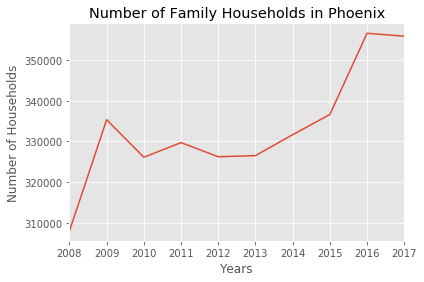

In [68]:
Family_Households.plot(kind='line')

plt.title('Number of Family Households in Phoenix')
plt.ylabel('Number of Households')
plt.xlabel('Years')


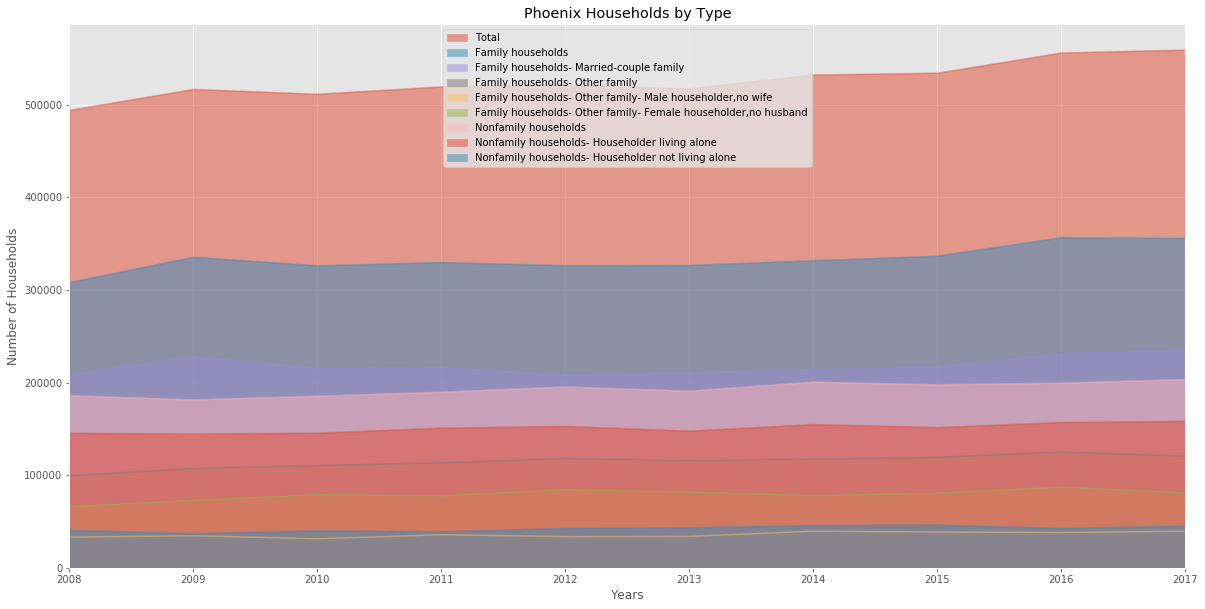

In [70]:

Household_data.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Phoenix Households by Type')
plt.ylabel('Number of Households')
plt.xlabel('Years')

plt.show()

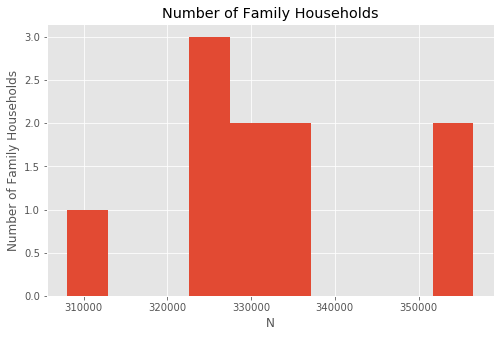

In [75]:
Family_Households.plot(kind='hist', figsize=(8, 5))

plt.title('Number of Family Households') # add a title to the histogram
plt.ylabel('Number of Family Households') # add y-label
plt.xlabel('N') # add x-label

plt.show()

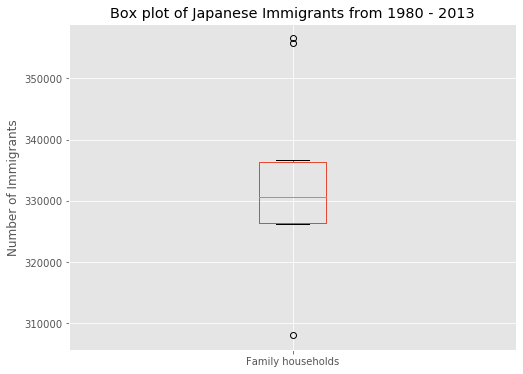

In [76]:
Family_Households.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Family Households between 2008 to 2017')
plt.ylabel('Number of Family Households')

plt.show()

In [1]:
Household_data

NameError: name 'Household_data' is not defined